In [1]:
import bilby
from waveforms import osc_freq_XPHM, mem_freq_XPHM
import matplotlib.pyplot as plt
import numpy as np

In [2]:
duration = 4
sampling_frequency = 2048
minimum_frequency = 20.0
maximum_frequency = 1024.0
reference_frequency = 20.0
waveform_name = 'IMRPhenomXPHM'
roll_off = 0.4
amplitude = 1.0

In [3]:
waveform_generator_bilby = bilby.gw.waveform_generator.WaveformGenerator(
    duration=duration,
    sampling_frequency=sampling_frequency,
    frequency_domain_source_model= bilby.gw.source.lal_binary_black_hole,
    parameter_conversion = bilby.gw.conversion.convert_to_lal_binary_black_hole_parameters,
    waveform_arguments=dict(duration=duration,
                            minimum_frequency=minimum_frequency,
                            maximum_frequency=maximum_frequency,
                            sampling_frequency=sampling_frequency,
                            reference_frequency=reference_frequency,
                            waveform_approximant=waveform_name,
                            )

)


waveform_generator_gwmemory = bilby.gw.waveform_generator.WaveformGenerator(
    duration=duration,
    sampling_frequency=sampling_frequency,
    frequency_domain_source_model= osc_freq_XPHM,
    parameter_conversion = bilby.gw.conversion.convert_to_lal_binary_black_hole_parameters,
    waveform_arguments=dict(duration=duration,
                            roll_off=roll_off,
                            minimum_frequency=minimum_frequency,
                            maximum_frequency=maximum_frequency,
                            sampling_frequency=sampling_frequency,
                            reference_frequency=reference_frequency,
                            bilby_generator = waveform_generator_bilby,
                            amplitude=amplitude)
)

21:39 bilby INFO    : Waveform generator initiated with
  frequency_domain_source_model: bilby.gw.source.lal_binary_black_hole
  time_domain_source_model: None
  parameter_conversion: bilby.gw.conversion.convert_to_lal_binary_black_hole_parameters
21:39 bilby INFO    : Waveform generator initiated with
  frequency_domain_source_model: waveforms.osc_freq_XPHM
  time_domain_source_model: None
  parameter_conversion: bilby.gw.conversion.convert_to_lal_binary_black_hole_parameters


iota 1.0471975511965976
theta_jn 1.0471975511965976


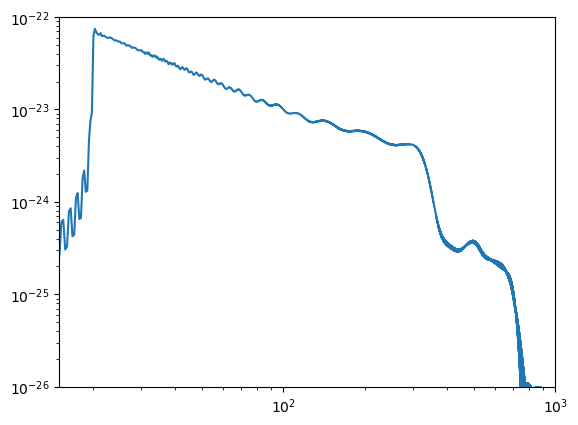

In [4]:
parameters = dict(
    mass_1=33,
    mass_2=30,
    a_1=0.5,
    a_2=0.4,
    luminosity_distance=400,
    theta_jn=np.pi/3,
    psi=1,                   # guess
    phase=5,                   # guess
    geocent_time=1126259642.413,
    ra=3,                
    dec=-1.2108,
    tilt_1 = 0,
    tilt_2 = 0,
    time_jitter=0,
    phi_12=0.2,
    phi_jl=0.2
)

frequency_array = waveform_generator_bilby.frequency_array

gwmemory_fd_strain = waveform_generator_gwmemory.frequency_domain_strain(parameters=parameters)

bilby_fd_strain = waveform_generator_bilby.frequency_domain_strain(parameters=parameters)

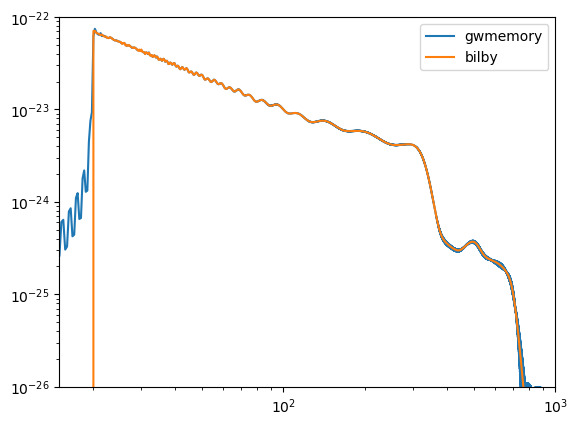

In [5]:
plt.figure()
plt.loglog(frequency_array, np.abs(gwmemory_fd_strain['plus']+gwmemory_fd_strain['cross']), label='gwmemory')
plt.loglog(frequency_array, np.abs(bilby_fd_strain['plus']+bilby_fd_strain['cross']), label='bilby')
plt.xlim(15, 1000)
plt.ylim(1e-26, 1e-22)
plt.legend()

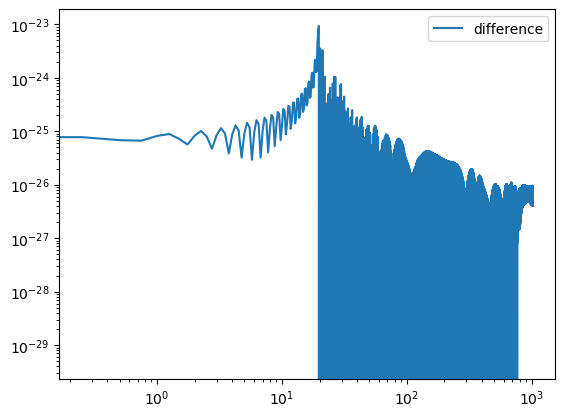

In [6]:
plt.figure()
plt.loglog(frequency_array, np.abs(gwmemory_fd_strain['plus']+gwmemory_fd_strain['cross'])-np.abs(bilby_fd_strain['plus']+bilby_fd_strain['cross']), label='difference')
plt.legend()